<a href="https://colab.research.google.com/github/Griffin-Jordan/StormStocks/blob/main/MC_beta/MC_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install dependencies

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [136]:
# from google.colab import drive
# drive.mount('/content/drive')

# stock_data = pd.read_csv('/content/drive/My Drive/DS440/MC_beta/stock_yfinance_data.csv')

In [137]:
# stock_data.head()

Only use stock that are in the Dow Jones index

In [138]:

stocks = [
    "MMM", "AXP", "AMGN", "AAPL", "BA", "CAT", "CVX",
    "CSCO", "KO", "DIS", "DOW", "GS", "HD",
    "HON", "IBM", "INTC", "JNJ", "JPM", "MCD",
    "MRK", "MSFT", "NKE", "PG", "CRM",
    "TRV", "UNH", "VZ", "V", "WMT", "WBA"
]
def get_data(stocks, start, end):
  stockData = pdr.get_data_yahoo(stocks, start, end)['Close']
  returns = stockData.pct_change()
  meanreturns = returns.mean()
  covMatrix = returns.cov()
  return meanreturns, covMatrix


In [139]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 300)

In [140]:
meanreturns, covMatrix = get_data(stocks, startDate, endDate)
print(meanreturns)

[*********************100%%**********************]  30 of 30 completed

Ticker
AAPL    0.000590
AMGN    0.000917
AXP     0.001472
BA      0.000169
CAT     0.001952
CRM     0.002106
CSCO    0.000244
CVX    -0.000412
DIS     0.000752
DOW     0.000075
GS      0.000653
HD      0.000956
HON     0.000090
IBM     0.002016
INTC    0.002241
JNJ    -0.000128
JPM     0.001249
KO     -0.000326
MCD     0.000017
MMM    -0.000456
MRK     0.000489
MSFT    0.001891
NKE    -0.000726
PG      0.000064
TRV     0.001042
UNH     0.000391
V       0.000962
VZ      0.000570
WBA    -0.001994
WMT     0.000549
dtype: float64


In [141]:
weights = np.random.random(len(meanreturns))
weights /= np.sum(weights)
print(weights)

[0.03326993 0.05178985 0.03693293 0.03729824 0.01280853 0.01601721
 0.03507576 0.02045773 0.01483602 0.04316897 0.04560106 0.02353455
 0.01277375 0.05157597 0.03668926 0.04771632 0.04555557 0.01349695
 0.0212341  0.05093378 0.05284019 0.00291498 0.05728087 0.01058434
 0.00576585 0.05618453 0.04859643 0.03999743 0.05166923 0.02339968]


In [142]:
mc_sims = 100 # number of simulations
T = 100 #timeframe in days
meanM = np.full(shape = (T, len(weights)), fill_value= meanreturns)
meanM = meanM.T
portfolio_sims = np.full(shape = (T, mc_sims), fill_value=0.0)
initialPortfolio = 10000

In [147]:
for m in range(0, mc_sims):
  Z = np.random.normal(size=(T, len(weights)))
  L = np.linalg.cholesky(covMatrix)
  dailyReturns = meanM + np.inner(L, Z)
  portfolio_sims[:, m] = np.cumprod(np.inner(weights,dailyReturns.T)+1)*initialPortfolio

<function matplotlib.pyplot.show(close=None, block=None)>

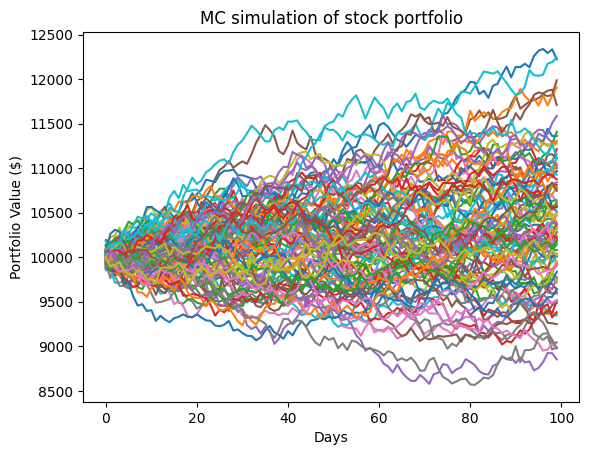

In [148]:
plt.plot(portfolio_sims)
plt.ylabel("Portfolio Value ($)")
plt.xlabel("Days")
plt.title("MC simulation of stock portfolio")
plt.show